In [1]:
#  Load results
import os
import pandas as pd

results_list = []
for idx in range(1, 11):
    results = pd.read_csv("./results/survey/results" + str(idx).zfill(3) + ".csv")
    results_list.append(results)

In [2]:
# Load form information
forms = []
for idx in range(1, 11):
    form = pd.read_csv("./forms/sample" + str(idx).zfill(3) + ".csv")
    forms.append(form)

In [4]:
# Create stats
class Stats():
    def __init__(self):
        self.full_understand = []
        self.full_sudden = []
        self.omit_understand = []
        self.omit_sudden = []
        self.differ = []
        self.condition = ""
        return
    
dict_understand = {
    "完全にわかる": 5,
    "おおよそわかる": 4,
    "ある程度わかる": 3,
    "あまりわからない": 2,
    "全くわからない": 1
}

def convert_understand(data):
    list_understand = [dict_understand[option] for option in data["understand"]]
    return list_understand

dict_sudden = {
    "非常に唐突である": 5,
    "やや唐突である": 4,
    "どちらともいえない": 3,
    "あまり唐突ではない": 2,
    "全く唐突ではない": 1
}

def convert_sudden(data):
    list_sudden = [dict_sudden[option] for option in data["sudden"]]
    return list_sudden

dict_differ = {
    "完全に同じである": 1,
    "少し異なっている": 2,
    "ある程度異なっている": 3,
    "大いに異なっている": 4,
    "完全に異なっている": 5
}

def convert_differ(data):
    list_differ = [dict_differ[option] for option in data["differ"]]
    return list_differ

stats_list = []
for form, results in zip(forms, results_list):
    for idx, row in enumerate(form.itertuples()):
        stats = Stats()

        data_full_understand = results.iloc[:, [7 + idx * 7]]
        data_full_understand = data_full_understand.set_axis(["understand"], axis=1)
        stats.full_understand = convert_understand(data_full_understand)

        data_full_sudden = results.iloc[:, [8 + idx * 7]]
        data_full_sudden = data_full_sudden.set_axis(["sudden"], axis=1)
        stats.full_sudden = convert_sudden(data_full_sudden)

        data_omit_understand = results.iloc[:, [4 + idx * 7]]
        data_omit_understand = data_omit_understand.set_axis(["understand"], axis=1)
        stats.omit_understand = convert_understand(data_omit_understand)

        data_omit_sudden = results.iloc[:, [5 + idx * 7]]
        data_omit_sudden = data_omit_sudden.set_axis(["sudden"], axis=1)
        stats.omit_sudden = convert_sudden(data_omit_sudden)

        data_differ = results.iloc[:, [9 + idx * 7]]
        data_differ = data_differ.set_axis(["differ"], axis=1)
        stats.differ = convert_differ(data_differ)

        stats.condition = row.condition

        stats_list.append(stats)

In [6]:
# Show summary
import statistics
import numpy as np

full_understand_high = []
full_sudden_high = []
omit_understand_high = []
omit_sudden_high = []
differ_high = []
full_understand_low = []
full_sudden_low = []
omit_understand_low = []
omit_sudden_low = []
differ_low = []

for stats in stats_list:
    # print("------------")
    # print("full understand: ", stats.full_understand)
    # print("full sudden: ", stats.full_sudden)
    # print("omit understand: ", stats.omit_understand)
    # print("omit sudden: ", stats.omit_sudden)
    # print("differ: ", stats.differ)
    # print("condition: ", stats.condition)
    if stats.condition == "high":
        full_understand_high.append(statistics.mean(stats.full_understand))
        full_sudden_high.append(statistics.mean(stats.full_sudden))
        omit_understand_high.append(statistics.mean(stats.omit_understand))
        omit_sudden_high.append(statistics.mean(stats.omit_sudden))
        differ_high.append(statistics.mean(stats.differ))
    else:
        full_understand_low.append(statistics.mean(stats.full_understand))
        full_sudden_low.append(statistics.mean(stats.full_sudden))
        omit_understand_low.append(statistics.mean(stats.omit_understand))
        omit_sudden_low.append(statistics.mean(stats.omit_sudden))
        differ_low.append(statistics.mean(stats.differ))

print("------")
print("full understand")
print("high: ", 
      #np.round(np.array(full_understand_high), 1), 
      "mean: ", statistics.mean(full_understand_high),
      "std: ", statistics.stdev(full_understand_high))
print("low: ", 
      #np.round(np.array(full_understand_low), 1), 
      "mean: ", statistics.mean(full_understand_low),
      "std: ", statistics.stdev(full_understand_low))
print("------")
print("full sudden")
print("high: ", 
      #np.round(np.array(full_sudden_high), 1), 
      "mean: ", statistics.mean(full_sudden_high),
      "std: ", statistics.stdev(full_sudden_high))
print("low: ", 
      #np.round(np.array(full_sudden_low), 1), 
      "mean: ", statistics.mean(full_sudden_low),
      "std: ", statistics.stdev(full_sudden_low))
print("------")
print("omit understand")
print("high: ", 
      #np.round(np.array(omit_understand_high), 1), 
      "mean: ", statistics.mean(omit_understand_high),
      "std: ", statistics.stdev(omit_understand_high))
print("low: ", 
      #np.round(np.array(omit_understand_low), 1), 
      "mean: ", statistics.mean(omit_understand_low),
      "std: ", statistics.stdev(omit_understand_low))
print("------")
print("omit sudden")
print("high: ", 
      #np.round(np.array(omit_sudden_high), 1), 
      "mean: ", statistics.mean(omit_sudden_high),
      "std: ", statistics.stdev(omit_sudden_high))
print("low: ", 
      #np.round(np.array(omit_sudden_low), 1), 
      "mean: ", statistics.mean(omit_sudden_low),
      "std: ", statistics.stdev(omit_sudden_low))
print("------")
print("differ")
print("high: ", 
      #np.round(np.array(differ_high), 1), 
      "mean: ", statistics.mean(differ_high),
      "std: ", statistics.stdev(differ_high))
print("low: ", 
      #np.round(np.array(differ_low), 1), 
      "mean: ", statistics.mean(differ_low),
      "std: ", statistics.stdev(differ_low))


------
full understand
high:  mean:  4.28 std:  0.5728553615932407
low:  mean:  4.473333333333334 std:  0.49068419075479636
------
full sudden
high:  mean:  1.94 std:  0.869461740860897
low:  mean:  1.68 std:  0.6665305983589597
------
omit understand
high:  mean:  2.94 std:  0.946864978749272
low:  mean:  2.546666666666667 std:  0.8877089674461748
------
omit sudden
high:  mean:  3.7466666666666666 std:  1.0488304684141871
low:  mean:  3.8733333333333335 std:  0.9686468107576309
------
differ
high:  mean:  2.6533333333333333 std:  0.6932129670505845
low:  mean:  3.6466666666666665 std:  0.9070397391709881


In [9]:
# U test
import statistics
import numpy as np
from scipy.stats import mannwhitneyu

full_understand_high = []
full_sudden_high = []
omit_understand_high = []
omit_sudden_high = []
differ_high = []
full_understand_low = []
full_sudden_low = []
omit_understand_low = []
omit_sudden_low = []
differ_low = []

for stats in stats_list:
    if stats.condition == "high":
        full_understand_high.extend(stats.full_understand)
        full_sudden_high.extend(stats.full_sudden)
        omit_understand_high.extend(stats.omit_understand)
        omit_sudden_high.extend(stats.omit_sudden)
        differ_high.extend(stats.differ)
    else:
        full_understand_low.extend(stats.full_understand)
        full_sudden_low.extend(stats.full_sudden)
        omit_understand_low.extend(stats.omit_understand)
        omit_sudden_low.extend(stats.omit_sudden)
        differ_low.extend(stats.differ)

print("------")
print("full understand")
print("high: ", 
      "mean: ", statistics.mean(full_understand_high),
      "std: ", statistics.stdev(full_understand_high))
print("low: ", 
      "mean: ", statistics.mean(full_understand_low),
      "std: ", statistics.stdev(full_understand_low))
U1, p1 = mannwhitneyu(full_understand_high, full_understand_low)
print("U: ", U1, "p: ", p1)
print("------")
print("full sudden")
print("high: ", 
      "mean: ", statistics.mean(full_sudden_high),
      "std: ", statistics.stdev(full_sudden_high))
print("low: ", 
      "mean: ", statistics.mean(full_sudden_low),
      "std: ", statistics.stdev(full_sudden_low))
U2, p2 = mannwhitneyu(full_sudden_high, full_sudden_low)
print("U: ", U2, "p: ", p2)
print("------")
print("omit understand")
print("high: ", 
      "mean: ", statistics.mean(omit_understand_high),
      "std: ", statistics.stdev(omit_understand_high))
print("low: ", 
      "mean: ", statistics.mean(omit_understand_low),
      "std: ", statistics.stdev(omit_understand_low))
U3, p3 = mannwhitneyu(omit_understand_high, omit_understand_low)
print("U: ", U3, "p: ", p3)
print("------")
print("omit sudden")
print("high: ", 
      "mean: ", statistics.mean(omit_sudden_high),
      "std: ", statistics.stdev(omit_sudden_high))
print("low: ", 
      "mean: ", statistics.mean(omit_sudden_low),
      "std: ", statistics.stdev(omit_sudden_low))
U4, p4 = mannwhitneyu(omit_sudden_high, omit_sudden_low)
print("U: ", U4, "p: ", p4)
print("------")
print("differ")
print("high: ", 
      "mean: ", statistics.mean(differ_high),
      "std: ", statistics.stdev(differ_high))
print("low: ", 
      "mean: ", statistics.mean(differ_low),
      "std: ", statistics.stdev(differ_low))
U5, p5 = mannwhitneyu(differ_high, differ_low)
print("U: ", U5, "p: ", p5)


------
full understand
high:  mean:  4.28 std:  0.8119906767078072
low:  mean:  4.473333333333334 std:  0.7207068367366968
U:  9785.0 p:  0.030272857145200848
------
full sudden
high:  mean:  1.94 std:  1.069591906120079
low:  mean:  1.68 std:  0.9646086246025992
U:  12926.0 p:  0.0150994468687194
------
omit understand
high:  mean:  2.94 std:  1.3170538608892277
low:  mean:  2.546666666666667 std:  1.2401919458857251
U:  13155.5 p:  0.009318635095870852
------
omit sudden
high:  mean:  3.7466666666666666 std:  1.3569936504412272
low:  mean:  3.8733333333333335 std:  1.281236120129981
U:  10735.0 p:  0.47116248844696706
------
differ
high:  mean:  2.6533333333333333 std:  1.2900583549917872
low:  mean:  3.6466666666666665 std:  1.316578169370372
U:  6721.5 p:  6.679763097064014e-10


Text(0.5, 1.0, 'differ low')

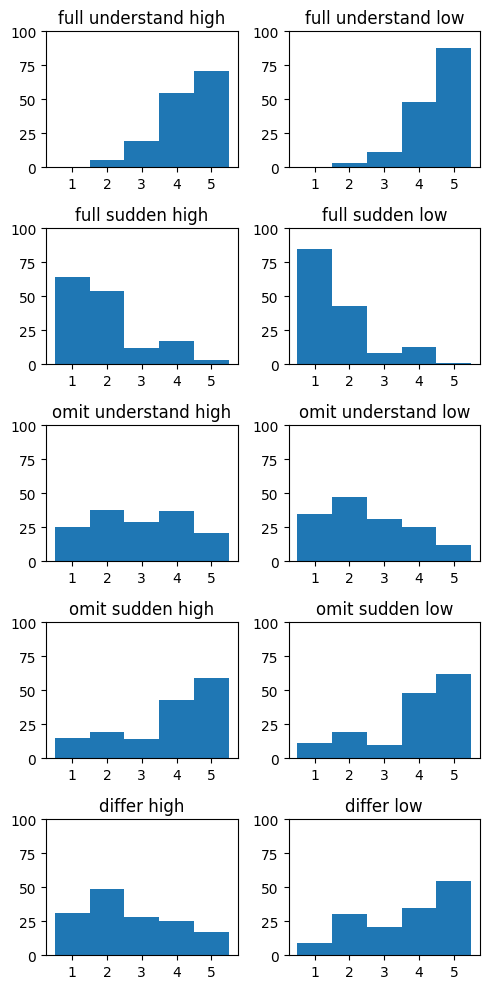

In [22]:
# Show histogram
import matplotlib.pyplot as plt

edges = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
xticks = [1, 2, 3, 4, 5]
yticks = [0, 25, 50, 75, 100]

fig = plt.figure(tight_layout=True, figsize=(5, 10))

hist1 = fig.add_subplot(5,2,1)
hist1.hist(full_understand_high, bins=edges)
hist1.set_xticks(xticks)
hist1.set_ylim(0, 100)
hist1.set_title("full understand high")

hist2 = fig.add_subplot(5,2,2)
hist2.hist(full_understand_low, bins=edges)
hist2.set_xticks(xticks)
hist2.set_ylim(0, 100)
hist2.set_title("full understand low")

hist3 = fig.add_subplot(5,2,3)
hist3.hist(full_sudden_high, bins=edges)
hist3.set_xticks(xticks)
hist3.set_ylim(0, 100)
hist3.set_title("full sudden high")

hist4 = fig.add_subplot(5,2,4)
hist4.hist(full_sudden_low, bins=edges)
hist4.set_xticks(xticks)
hist4.set_ylim(0, 100)
hist4.set_title("full sudden low")

hist5 = fig.add_subplot(5,2,5)
hist5.hist(omit_understand_high, bins=edges)
hist5.set_xticks(xticks)
hist5.set_ylim(0, 100)
hist5.set_title("omit understand high")

hist6 = fig.add_subplot(5,2,6)
hist6.hist(omit_understand_low, bins=edges)
hist6.set_xticks(xticks)
hist6.set_ylim(0, 100)
hist6.set_title("omit understand low")

hist7 = fig.add_subplot(5,2,7)
hist7.hist(omit_sudden_high, bins=edges)
hist7.set_xticks(xticks)
hist7.set_ylim(0, 100)
hist7.set_title("omit sudden high")

hist8 = fig.add_subplot(5,2,8)
hist8.hist(omit_sudden_low, bins=edges)
hist8.set_xticks(xticks)
hist8.set_ylim(0, 100)
hist8.set_title("omit sudden low")

hist9 = fig.add_subplot(5,2,9)
hist9.hist(differ_high, bins=edges)
hist9.set_xticks(xticks)
hist9.set_ylim(0, 100)
hist9.set_title("differ high")

hist10 = fig.add_subplot(5,2,10)
hist10.hist(differ_low, bins=edges)
hist10.set_xticks(xticks)
hist10.set_ylim(0, 100)
hist10.set_title("differ low")